## En este programa integramos el problema de N-cuerpos

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Constantes

In [4]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 
N   = 1000
m = np.ones(N)*1e10
m = m/N

### Generamos las condiciones iniciales

In [10]:
import random
import uniform_density as ud

random.seed(15)

range_r3  = np.linspace(0, 1/3., 2*N)
range_ct  = np.linspace(-1, 1, 2*N)
range_phi = np.linspace(0, 2*np.pi, 2*N)

r3  = np.random.choice(range_r3,  N, replace = True) #r**3
ct  = np.random.choice(range_ct,  N, replace = True) #cos(t)
phi = np.random.choice(range_phi, N, replace = True) #phi

st = np.sqrt(1. - ct**2) #sen(t)

xi = (r3*3)**(1/3.) * st * np.cos(phi)
yi = (r3*3)**(1/3.) * st * np.sin(phi)
zi = (r3*3)**(1/3.) * ct
    
# x, y, z = ud.dens(N)

xi = xi*100
yi = yi*100
zi = zi*100

vxi = np.zeros(N)
vyi = np.zeros(N)
vzi = np.zeros(N)



In [11]:
pos = np.ndarray([N,3])
pos[:,0] = xi
pos[:,1] = yi
pos[:,2] = zi

#print pos

vel = np.ndarray([N,3])
vel[:,0] = vxi
vel[:,1] = vyi
vel[:,2] = vzi

np.savetxt('/home/omarioni/mn2/_data/NC/pos_Ncuerpos.dat', pos)
np.savetxt('/home/omarioni/mn2/_data/NC/vel_Ncuerpos.dat', vel)
# print vel

In [3]:
posi = loadtxt('/home/omarioni/mn2/_data/NC/pos_Ncuerpos.dat')
x = posi[:,0]
y = posi[:,1]
z = posi[:,2]

veli = loadtxt('/home/omarioni/mn2/_data/NC/vel_Ncuerpos.dat')
vx = veli[:,0]
vy = veli[:,1]
vz = veli[:,2]

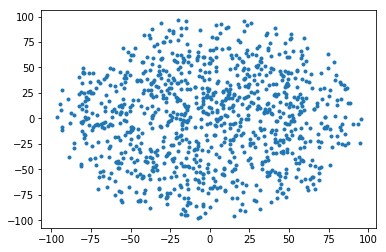

In [4]:
plot(x,y,'.')

In [5]:
from integradoresnc import *
ax,ay,az = integradores_modificado.aceleracion(eps,m,x,y,z)

### Acá definimos el paso y el numero de pasos

In [9]:
dt = 0.001  #paso
nit = 10000   #numero de pasos

# EULER

In [18]:
from integradores_modificado import *
h = integradores_modificado.euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [5]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_euler.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_euler.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)
print shape(vxf)

(1001, 1000)
(1001, 1000)


/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


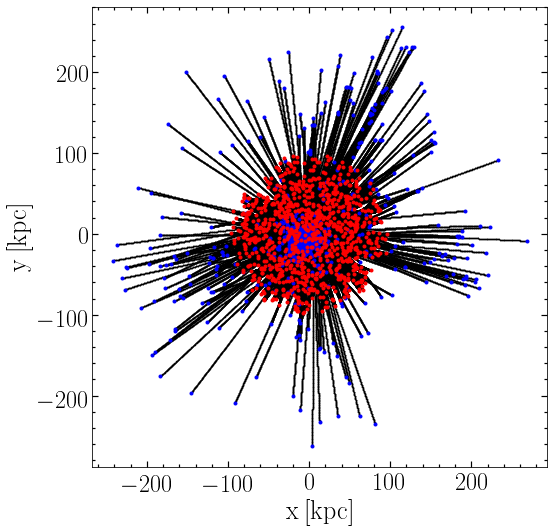

In [6]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.plot(xf[0,:],yf[0,:],'.r')
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$\mathrm{x\:[kpc]}$', fontsize=26)
ax.set_ylabel(r'$\mathrm{y\:[kpc]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [9]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [14]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
np.savetxt(path+'epot_euler.dat', e_pot)

In [10]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
epot = np.loadtxt(path + 'epot_euler.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


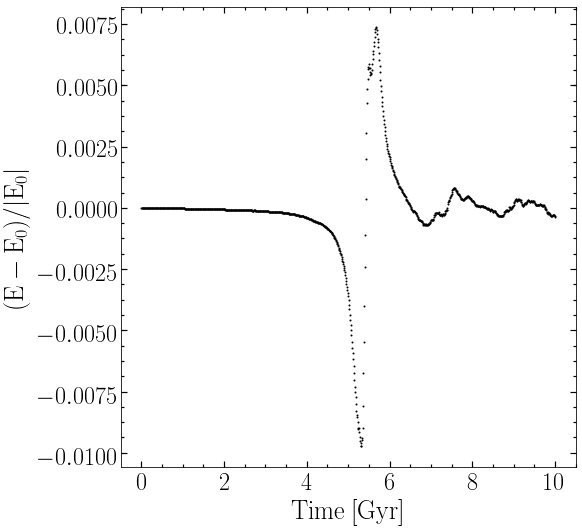

In [11]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

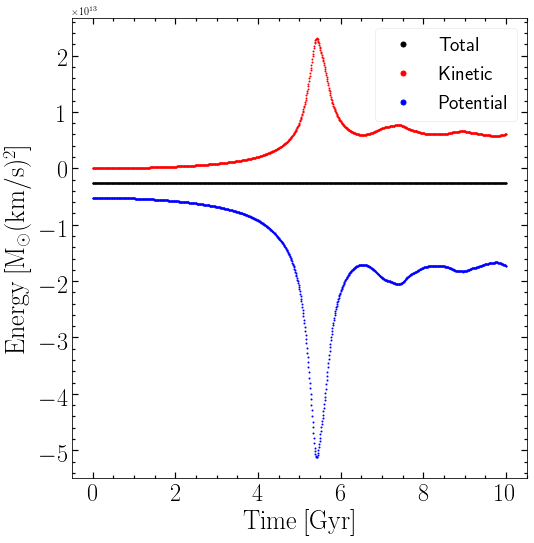

In [12]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)

ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [14]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

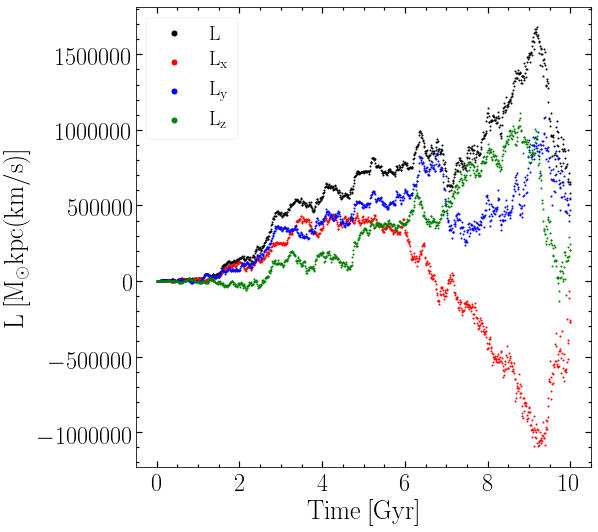

In [15]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=2)
Lx_ = ax.plot(time,Lx,'.r', markersize=2)
Ly_ = ax.plot(time,Ly,'.b', markersize=2)
Lz_ = ax.plot(time,Lz,'.g', markersize=2)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE

In [31]:
g = integradores_modificado.rungek(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [16]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_runge.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_runge.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)


(1001, 1000)


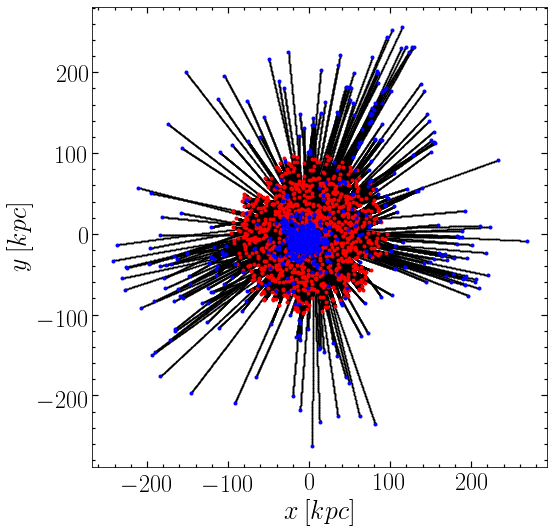

In [17]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [24]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [25]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
np.savetxt(path+'epot_runge.dat', e_pot)

In [18]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
epot = np.loadtxt(path + 'epot_runge.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


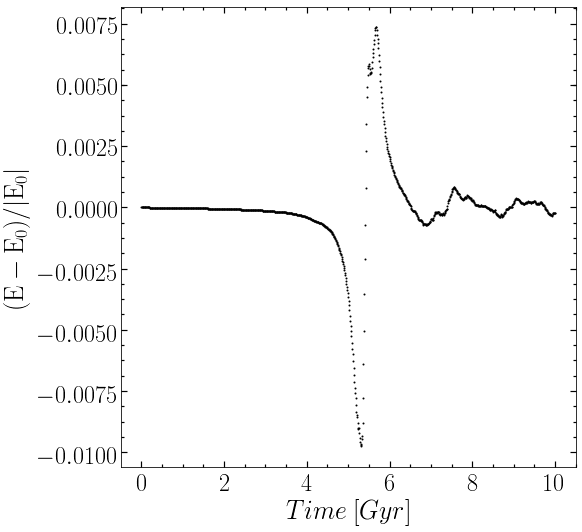

In [23]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

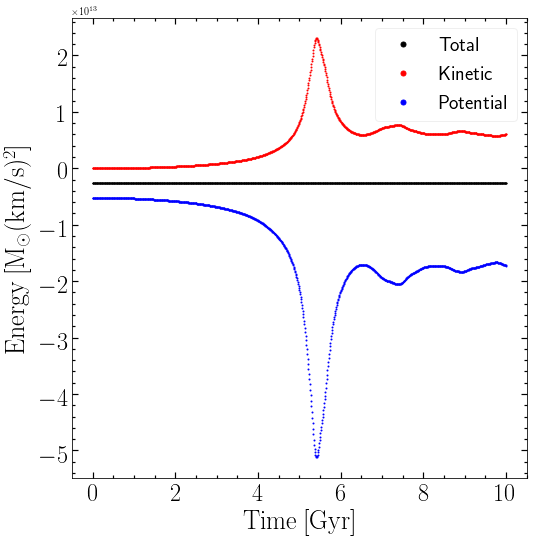

In [24]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)

ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [25]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

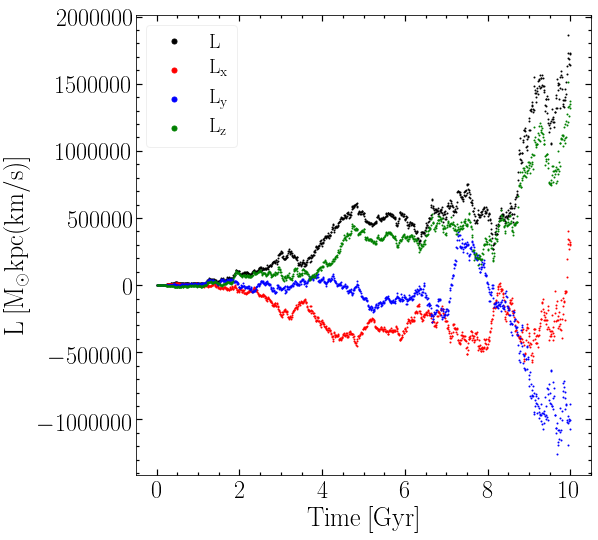

In [26]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=2)
Lx_ = ax.plot(time,Lx,'.r', markersize=2)
Ly_ = ax.plot(time,Ly,'.b', markersize=2)
Lz_ = ax.plot(time,Lz,'.g', markersize=2)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - DKD

In [40]:
w = integradores_modificado.driftkdrift(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [27]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_DKD.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_DKD.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(1001, 1000)


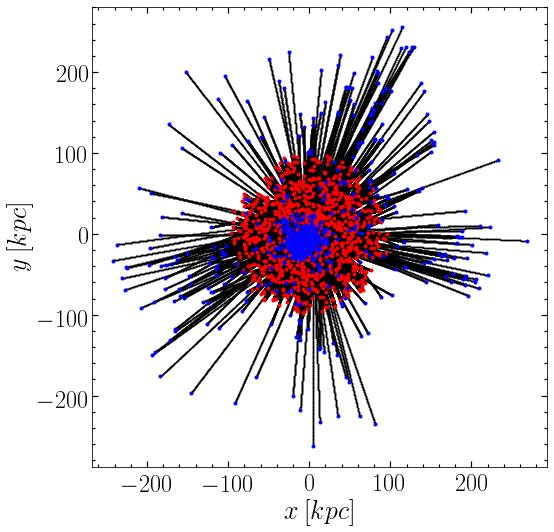

In [28]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [31]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [32]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
np.savetxt(path+'epot_DKD.dat', e_pot)

In [29]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
epot = np.loadtxt(path + 'epot_DKD.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


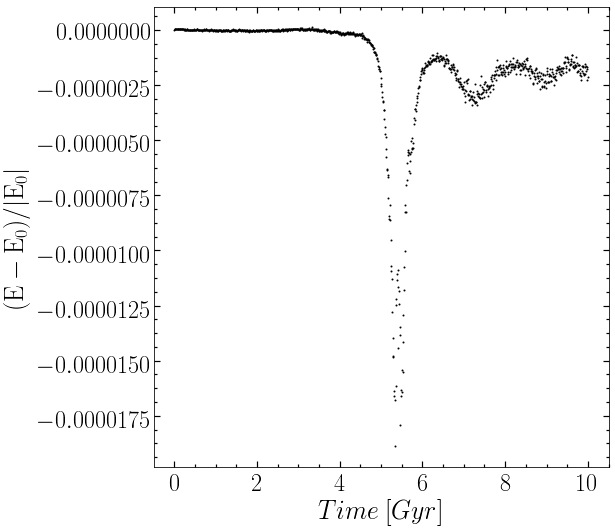

In [31]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

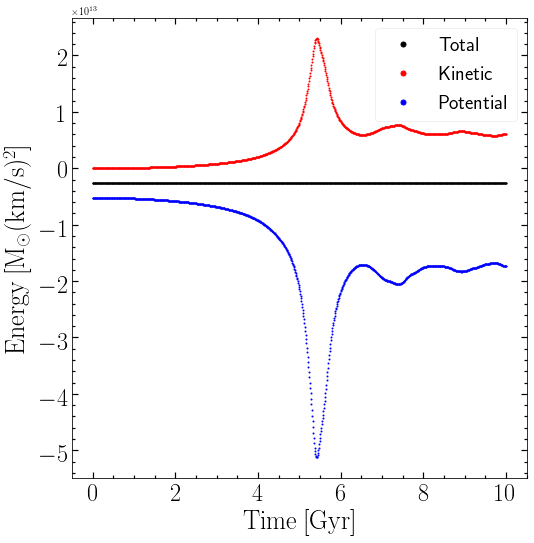

In [32]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [33]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

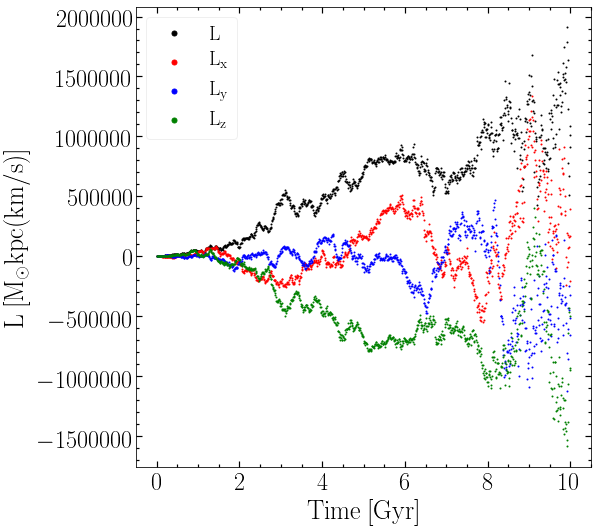

In [34]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=2)
Lx_ = ax.plot(time,Lx,'.r', markersize=2)
Ly_ = ax.plot(time,Ly,'.b', markersize=2)
Lz_ = ax.plot(time,Lz,'.g', markersize=2)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - KDK

In [50]:
s = integradores_modificado.kickdkick(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

In [35]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'

posf = np.loadtxt(path+'pos_KDK.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_KDK.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(1001, 1000)


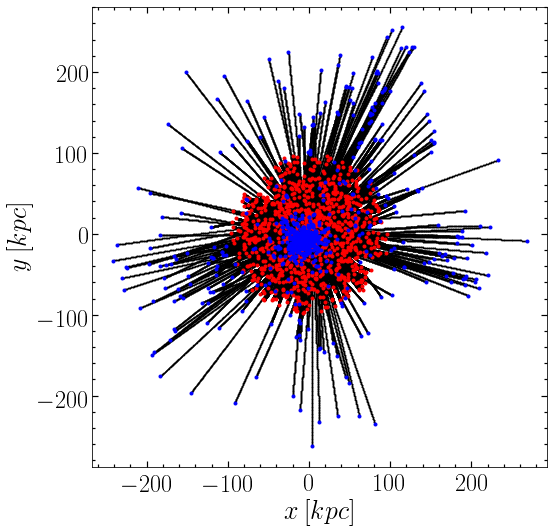

In [36]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'.k', markersize=1)
ax.plot(xf[0,:],yf[0,:],'.r')
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [38]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [39]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
np.savetxt(path+'epot_KDK.dat', e_pot)

In [38]:
path = '/home/omarioni/mn2/_data/NC/fortran_run/'
epot = np.loadtxt(path + 'epot_KDK.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(1001,)
(1001,)


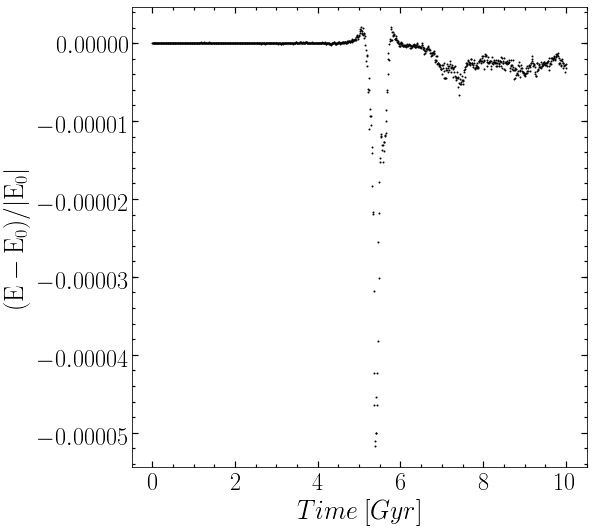

In [39]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

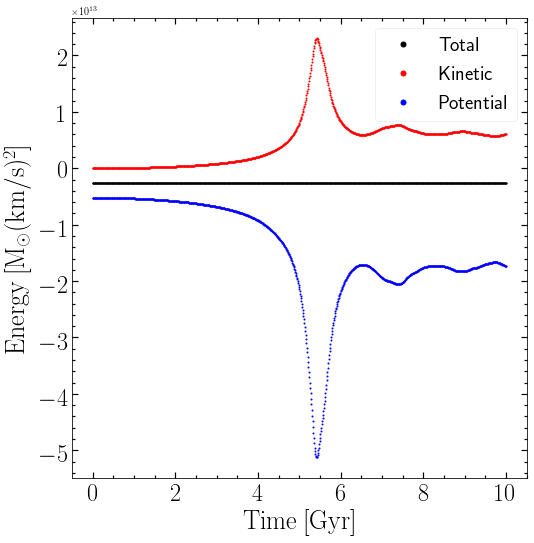

In [40]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=2)
Ecin = ax.plot(time,K,'.r', markersize=2)
Epot = ax.plot(time,-U,'.b', markersize=2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [41]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

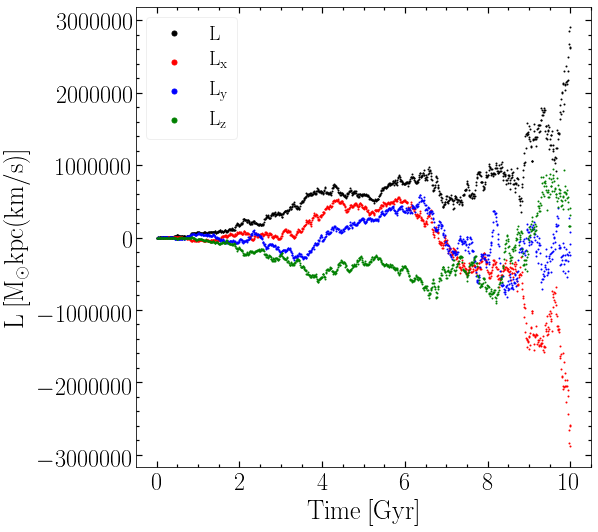

In [42]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=2)
Lx_ = ax.plot(time,Lx,'.r', markersize=2)
Ly_ = ax.plot(time,Ly,'.b', markersize=2)
Lz_ = ax.plot(time,Lz,'.g', markersize=2)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()